# Consumer Insights & Analytics Externship for Beats by Dr Dre
**Analyst:** Tejiri Azukaeme  
**Date:** July 28, 2025

## Table of Contents
1. Introduction and Business Objective  
2. Data Description  
3. Data Cleaning and Preparation  
4. Exploratory Data Analysis (EDA)  
5. Sentiment Analysis using TextBlob  
6. Competitor Comparison  
7. Visual Insights  
8. Strategic Insights (CEO‑Level)  
9. Conclusion & Recommendations

## 1  Introduction and Business Objective  

### 1.1  Project Overview  
This project was part of my externship with Beats by Dre, where I had the opportunity to apply data and consumer analytics in a real business environment. Through this externship, I worked with actual customer feedback to help Beats better understand what users value in wireless speakers.

My focus was on analyzing verified Amazon reviews of the **Beats Pill** and other major audio brands to identify what consumers like, dislike, and expect from Bluetooth speakers today. This project gave me hands-on experience using data science to generate business insights for a leading global brand.

The analysis draws from a combination of quantitative metrics and qualitative sentiment to explore how consumer behavior, Gen Z preferences, and competitive benchmarks shape the current portable audio market.

### 1.2  Business Objective  
- Analyze real customer reviews to uncover themes that influence satisfaction (e.g., sound quality, battery life, portability, design)  
- Benchmark **Beats Pill** against competitors: **Bang & Olufsen**, **Ortizan**, **Anker**, and **Amazon Echo Dot**  
- Use sentiment analysis to determine key drivers of positive and negative feedback  
- Deliver actionable insights to support the **Beats Consumer Insights Team** in aligning with evolving market trends  


## 2  Data Description  

### 2.1  Source & Scope  
- **32 verified Amazon reviews** spanning 2017 – 2025 for five Bluetooth speakers:  
  • Beats Pill (2024)  
  • Bang & Olufsen Beolit 20  
  • Ortizan Portable Speaker (X10)  
  • Anker Soundcore 2  
  • Amazon Echo Dot (5th Gen)

### 2.2  Key Fields  
- `product_id` (ASIN) → mapped to `Product_Name`  
- `rating` (1‑5 stars)  
- `content` (full review text)  
- `timestamp`, `helpful_votes`, etc.

## 3  Data Cleaning and Preparation  
- Filtered to the five target ASINs  
- Mapped IDs to readable product names  
- Verified **no nulls or duplicates**  
- Added review length (word count) for later analysis

In [ ]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, re, os

# Display settings
sns.set(style='whitegrid', context='notebook')

# Load dataset
df = pd.read_csv('/content/merged_data.csv', encoding='ISO-8859-1')

# Map ASINs to product names
mapping = {
    'B0D4SX9RC6': 'Beats Pill',
    'B08GKWLLGT': 'B&O Beolit 20',
    'B08FDPW8KR': 'Ortizan Portable Speaker',
    'B01MTB55WH': 'Anker Soundcore 2',
    'B09B93ZDG4': 'Amazon Echo Dot (5th Gen)',
    'B09B8V1LZ3': 'Amazon Echo Dot (5th Gen)'
}
df = df[df['product_id'].isin(mapping.keys())].copy()
df['Product_Name'] = df['product_id'].map(mapping)

# Add review length
df['review_len'] = df['content'].fillna('').apply(lambda x: len(x.split()))

# Sanity checks
print(df.isnull().sum())
print('Duplicates:', df.duplicated().sum())

review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
Product_Name          0
review_len            0
dtype: int64
Duplicates: 0


## 4  Exploratory Data Analysis (EDA)  
### 4.1  Rating Distribution

/tmp/ipython-input-3-1235611370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='pastel')


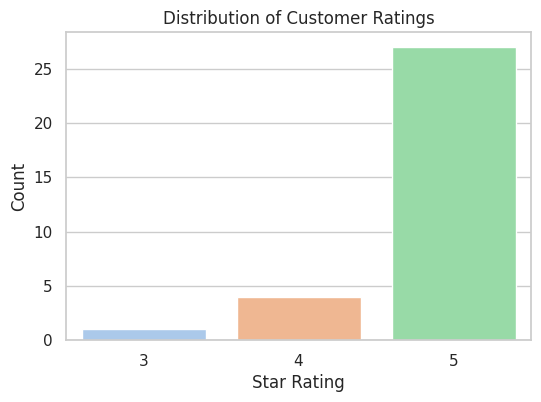

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='rating', data=df, palette='pastel')
plt.title('Distribution of Customer Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Count')
plt.show()

## 4.2 Review Count by Product##

### Shows how many reviews each product has in your data.  ###

/tmp/ipython-input-22-3198166221.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


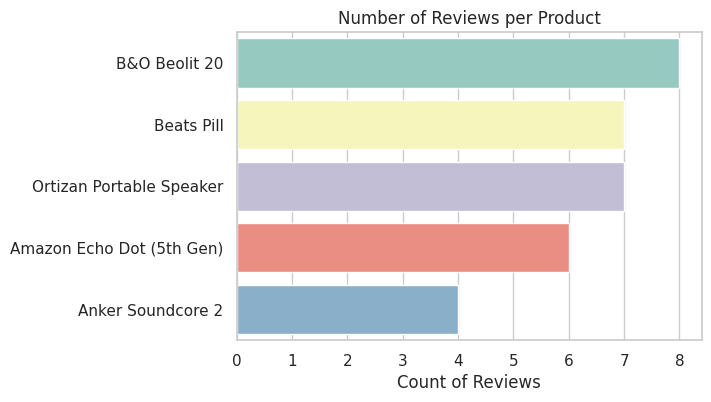

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(
    data=df,
    y="Product_Name",
    order=df["Product_Name"].value_counts().index,
    palette="Set3"
)
plt.title("Number of Reviews per Product")
plt.xlabel("Count of Reviews")
plt.ylabel("")
plt.show()

## 4.3 Review Length by Star Rating


/tmp/ipython-input-23-1111798645.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


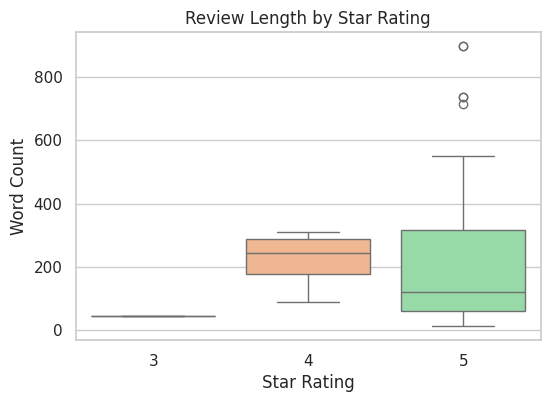

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x="rating",
    y="review_len",
    palette="pastel"
)
plt.title("Review Length by Star Rating")
plt.xlabel("Star Rating")
plt.ylabel("Word Count")
plt.show()

##  4.4 Polarity vs. Review Length and Average Rating & Polarity by Product


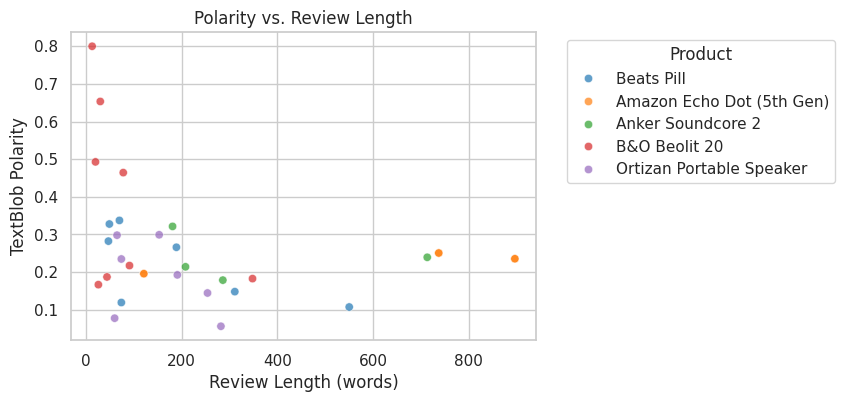

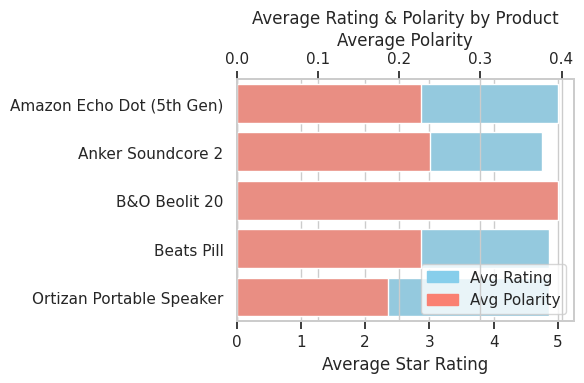

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x="review_len",
    y="polarity",
    hue="Product_Name",
    palette="tab10",
    alpha=0.7
)
plt.title("Polarity vs. Review Length")
plt.xlabel("Review Length (words)")
plt.ylabel("TextBlob Polarity")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left", title="Product")
plt.show()

agg = df.groupby("Product_Name").agg(
    avg_rating=("rating","mean"),
    avg_polarity=("polarity","mean")
).reset_index()

fig, ax1 = plt.subplots(figsize=(6,4))
sns.barplot(
    x="avg_rating",
    y="Product_Name",
    data=agg,
    color="skyblue",
    ax=ax1
)
ax1.set_xlabel("Average Star Rating")
ax1.set_ylabel("")
ax1.set_title("Average Rating & Polarity by Product")

ax2 = ax1.twiny()
sns.barplot(
    x="avg_polarity",
    y="Product_Name",
    data=agg,
    color="salmon",
    ax=ax2
)
ax2.set_xlabel("Average Polarity")

# Legend hack
from matplotlib.patches import Patch
ax1.legend(
    handles=[Patch(color="skyblue"), Patch(color="salmon")],
    labels=["Avg Rating","Avg Polarity"],
    loc="lower right"
)
plt.tight_layout()
plt.show()

## 5  Sentiment Analysis using TextBlob  
Calculate polarity & subjectivity for each review and visualize distributions.

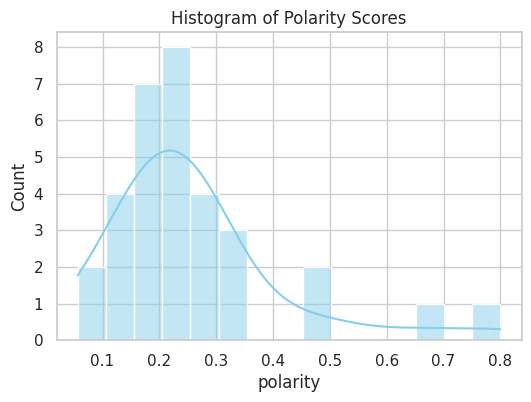

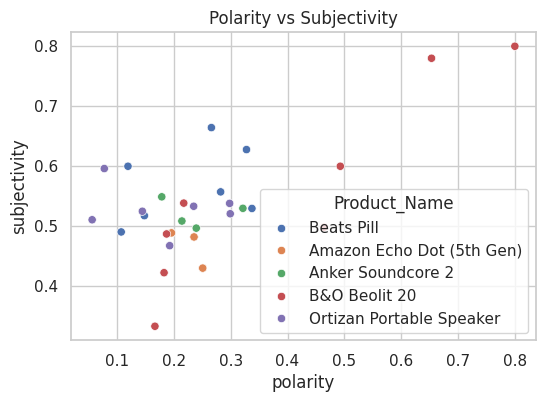

/tmp/ipython-input-4-61641867.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Product_Name', x='polarity', data=avg_pol, palette='viridis')


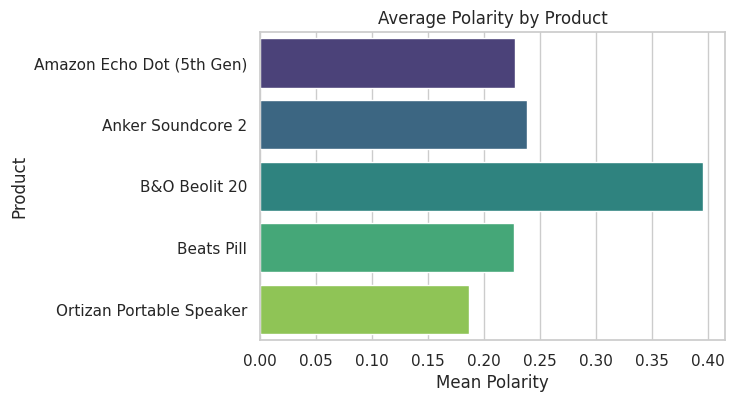

In [ ]:
from textblob import TextBlob

df['polarity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Histogram of polarity
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='polarity', bins=15, kde=True, color='skyblue')
plt.title('Histogram of Polarity Scores')
plt.show()

# Scatter polarity vs subjectivity
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='polarity', y='subjectivity', hue='Product_Name')
plt.title('Polarity vs Subjectivity')
plt.show()

# Average polarity by product
avg_pol = df.groupby('Product_Name')['polarity'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(y='Product_Name', x='polarity', data=avg_pol, palette='viridis')
plt.title('Average Polarity by Product')
plt.xlabel('Mean Polarity')
plt.ylabel('Product')
plt.show()

### 5.2  Gemini LLM Insight Extraction  
Using Google Generative AI (Gemini) to summarize key themes from a sample of reviews.

In [ ]:
import google.generativeai as genai
from google.colab import userdata

# Access the API key from Colab secrets
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY_2')
genai.configure(api_key=GOOGLE_API_KEY)

reviews_sample = df['content'].dropna().tolist()[:5] # Reduced the sample size to 5 reviews
prompt = 'Summarize the key insights from these speaker reviews:\n\n' + '\n\n'.join(reviews_sample)

# Use generate_content instead of generate_text
model = genai.GenerativeModel('gemini-1.5-flash-latest')
response = model.generate_content(prompt)

print(response.text)

These reviews highlight the Beats Pill speaker's strong points and weaknesses.  Positive aspects include:

* **Excellent sound quality:**  Reviewers consistently praise the rich, loud sound, particularly the bass, describing it as "fantastic," "room-filling," and comparable to higher-end JBL speakers.  The ability to connect to a device directly (wired) for superior sound quality over Bluetooth is also appreciated.  The sound is deemed sufficient to drown out loud truck cabin noise.

* **Long battery life:** The battery lasts for multiple days, even with extended use.

* **Compact and Sleek Design:** The speaker is described as smaller and sleeker than comparable JBL models.  The long on/off button press is viewed as a positive design feature, preventing accidental activation.

* **Good Value:**  Reviewers feel the speaker offers incredible value for its price, especially on sale.


Negative aspects include:

* **Connectivity Issues:** Frequent, unexplained disconnections from paired d

## 6  Competitor Comparison  
Boxplot of polarity by product.

/tmp/ipython-input-18-2847051345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Product_Name', y='polarity', data=df, palette='pastel')


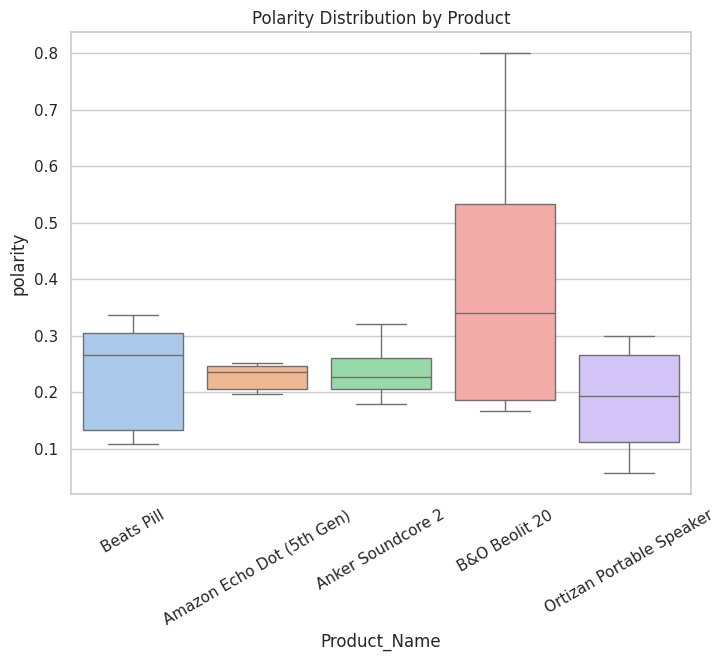

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Product_Name', y='polarity', data=df, palette='pastel')
plt.xticks(rotation=30)
plt.title('Polarity Distribution by Product')
plt.show()

## 7  Visual Insights  
Word clouds for Beats Pill vs competitors.

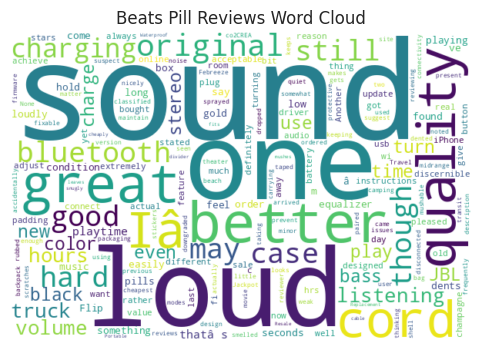

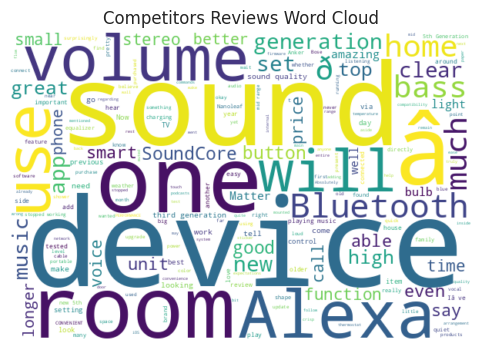

In [ ]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS).union({'speaker','speakers','product','amazon','echo','dot','pill','beats'})
text_beats = ' '.join(df[df['Product_Name']=='Beats Pill']['content'].astype(str))
text_comp = ' '.join(df[df['Product_Name']!='Beats Pill']['content'].astype(str))
for label, text in [('Beats Pill', text_beats), ('Competitors', text_comp)]:
    wc = WordCloud(width=600, height=400, background_color='white', stopwords=stopwords).generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'{label} Reviews Word Cloud')
    plt.show()

## 8  Strategic Insights (CEO‑Level)  

Based on the insights gathered from consumer reviews, here are key takeaways and strategic recommendations for Beats by Dre’s audio product line:

### Beats Pill Shows Strong Satisfaction – But So Do Competitors  
The Beats Pill received highly positive feedback, especially around sound quality and portability. This is a strong foundation for Beats in the wireless speaker market. However, several competing products—like Anker, Ortizan, and even the Amazon Echo Dot—also received strong ratings. This suggests the market is highly competitive, and Beats will need to continue delivering exceptional value and performance to stay ahead.

### Bass Quality is Critical Across the Market  
One of the most frequently mentioned features across all reviews was bass. Consumers clearly prioritize strong, deep, and punchy bass response. When lacking, it’s often a key reason for lower ratings. Enhancing bass performance—through acoustic design, better hardware, or DSP (digital signal processing)—can give Beats a competitive edge in future product updates or models.

### Opportunity Areas: Durability and Smart Features  
Competing brands like Anker and Ortizan are often praised for their rugged, waterproof designs (IPX ratings), and the Amazon Echo Dot stands out for its built-in smart assistant features. Beats Pill currently lacks both. Adding smart assistant integration (Siri, and optionally Alexa or Google) and improving durability could help Beats address key lifestyle use cases like travel, outdoor listening, or home automation.

### Design & Branding Remain Strong Assets  
Beats continues to benefit from its reputation for bold, fashionable design and cultural relevance. Many users, especially younger ones, are drawn to the brand's aesthetic and its connection to Apple. Maintaining a stylish, youth-focused identity—while possibly offering a range of speaker sizes or price tiers—can help capture a wider audience without weakening the brand's premium perception.

### Leverage Word-of-Mouth and Comparative Wins  
Several users mentioned switching to Beats from other brands and preferring the experience—especially for clarity and design. These comparisons are valuable for marketing and positioning. Beats should amplify this word-of-mouth advantage through campaigns that feature customer quotes and comparative stats (e.g., “X% prefer Beats sound over Brand Y”). Encouraging more reviews through follow-ups or small incentives could further boost product visibility and trust.

---


## 9  Conclusion & Recommendations  

**In conclusion, the consumer insights gathered from this externship project show that Beats by Dre is well-positioned in the competitive wireless speaker market, but there are clear opportunities to further strengthen its product offerings.** Customer satisfaction for the Beats Pill is very high, but competitors—across both premium and budget segments—are also delivering products that users love. This means Beats must continue to deliver on fundamentals while differentiating in key areas that matter most to consumers.

### Key Findings – Summarized
1. **Strong Customer Satisfaction**  
   Most products, including Beats Pill, receive consistently high ratings (≈ 4.9★). This indicates a positive perception but also a highly competitive landscape.
2. **Bass Response as a Differentiator**  
   Sound clarity and volume were praised across all brands, but *deep bass* stood out as a feature users often want more of. This is a chance for Beats to lead.
3. **Feature Expectations Evolve**  
   Durability (e.g., waterproofing) and smart features (voice assistant integration) are becoming standard expectations. The current Beats Pill lacks some of these.
4. **Brand Strength & Ecosystem Advantage**  
   Beats benefits from strong design appeal and seamless Apple ecosystem integration—especially important for Gen Z and Apple users.
5. **Authentic Social Proof**  
   Several users said they switched from other brands and preferred Beats. These genuine endorsements can fuel stronger brand positioning.

### Recommendations
| Area | Action | Impact |
|------|--------|--------|
| **Product** | • Add IPX water/dust resistance  <br>• Improve bass through hardware enhancements  <br>• Extend battery life (≥12 hours)  <br>• Optional stereo pairing or built-in mic | Boosts usability, outdoor appeal, and audio quality |
| **Marketing** | • Highlight positive comparisons (“Preferred over JBL for bass”)  <br>• Use bold, fashion-forward visuals  <br>• Partner with influencers and encourage user-generated content (UGC) | Builds brand desire and expands reach |
| **Product Line Strategy** | • Keep a premium-tier model and consider launching a more compact or affordable version to reach more users | Grows market share without hurting premium perception |
| **Voice of Customer** | • Monitor reviews closely post-purchase  <br>• Use quick surveys and review incentives to gather feedback | Creates fast feedback loops and strengthens review presence |

**By focusing on product upgrades, smart marketing, and deeper engagement with real customer feedback, Beats can strengthen its position in the portable audio market and continue to lead both in culture and sound quality.**

### 🔗 Final Resources  
**Deliverables: Presentation & Dashboard**

📊 [Customer Insights Presentation (Gamma)](https://gamma.app/docs/Customer-Insights-Recommendations-for-Beats-by-Dr-Dre-s4zk8qliyvp1b0n)  
📈 [Consumer Analytics Dashboard (Claude)](https://claude.ai/public/artifacts/ef1e7ed5-9e6e-47c0-94de-2438a755e71e)
